In [ ]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
                   header=1, index_col=0)
df.rename(columns={"default payment next month": "default"}, inplace=True)
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


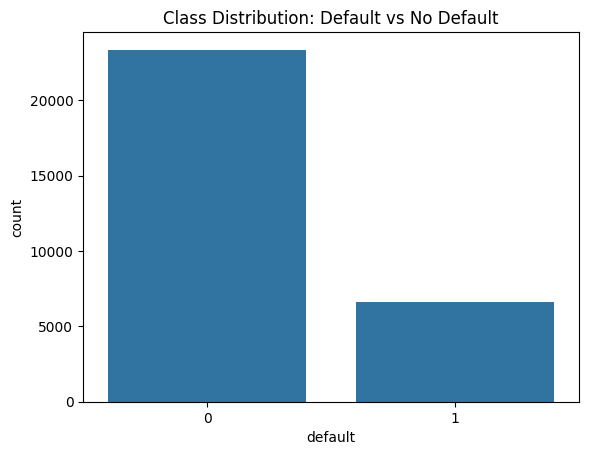

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='default')
plt.title('Class Distribution: Default vs No Default')
plt.show()

print(df['default'].value_counts(normalize=True))


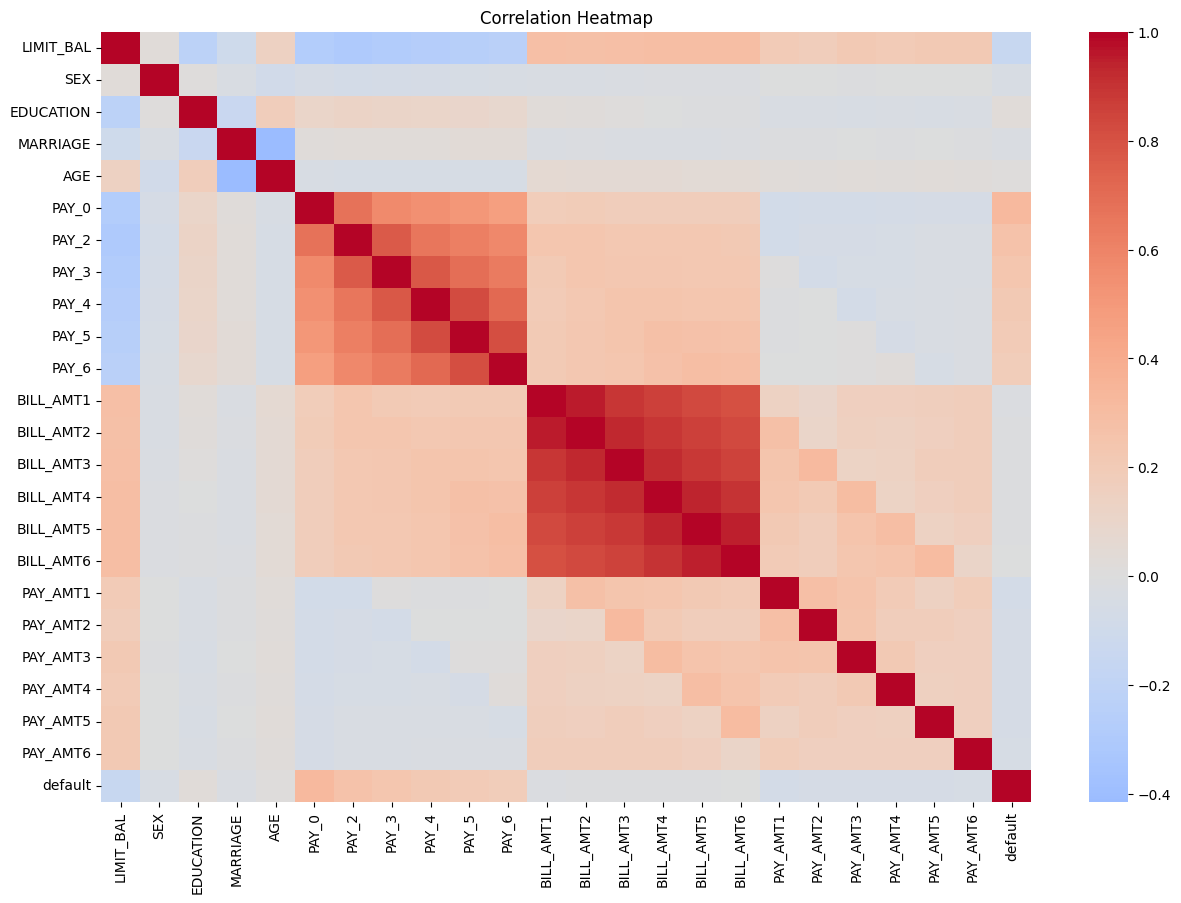

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print("Missing values:\n", df.isnull().sum())

X = df.drop('default', axis=1)
y = df['default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
 LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")



--- Decision Tree ---
Accuracy: 0.7148333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000

Confusion Matrix:
 [[3741  932]
 [ 779  548]]

--- Logistic Regression ---
Accuracy: 0.8078333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:
 [[4529  144]
 [1009  318]]


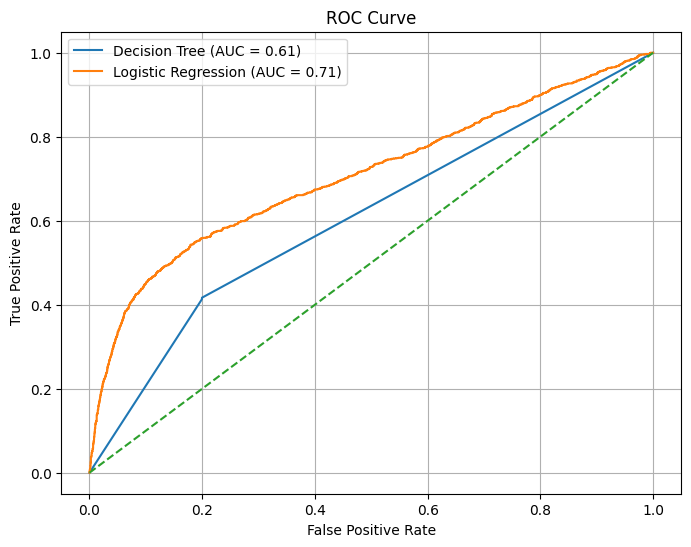

In [ ]:
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %.2f)' % roc_auc_score(y_test, y_proba_dt))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.2f)' % roc_auc_score(y_test, y_proba_lr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Decision Tree CV Accuracy:", cross_val_score(dt_model, X_scaled, y, cv=cv, scoring='accuracy').mean())
print("Logistic Regression CV Accuracy:", cross_val_score(lr_model, X_scaled, y, cv=cv, scoring='accuracy').mean())


Decision Tree CV Accuracy: 0.7287000000000001
Logistic Regression CV Accuracy: 0.8109666666666666
